In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from itertools import combinations

In [2]:
def generate_binary_vectors(n):
    binary_vectors = np.array([[int(j) for j in format(i, '0'+str(n)+'b')] for i in range(2**n)])#n차원의 모든 이진벡터 생성
    return binary_vectors

In [8]:
def func(result,n):
    A=[]
    for subset in result:
        T=True
        for i in subset:
            for a,b in enumerate(i):
                if b==0:
                    B=i.copy()
                    B[a]=1
                    if B not in subset:
                        T=False
                        break
                if T==False:
                    break
            if T==False:
                break
            for a,b in combinations(range(len(i)),2):
                if i[a]==1 and i[b]==1:
                    continue
                B=i.copy()
                B[a]=1
                B[b]=1
                if i[a]==1 and i[b]==0:
                    if B not in subset:
                        T=False
                        break
                C=i.copy()
                C[a]=1
                C[b]=0
                if i[a]==0 and i[b]==1:
                    if B not in subset or C not in subset:
                        T=False
                        break
                D=i.copy()
                C[a]=0
                C[b]=1
                if i[a]==0 and i[b]==0:
                    if B not in subset or C not in subset or D not in subset:
                        T=False
                        break
            if T==False:
                break
        if T==True and len(subset) !=0:
            A.append(subset)
    return [np.array(sublist) for sublist in A]

In [9]:
def Boolean_func(n):                   #dp 사용해서 n=5일떄 A구해짐
    if n==2:
        A=[
                [[1, 1]],
                [[1, 0], [1, 1]],
                [[0, 1], [1, 0], [1, 1]],
                [[0, 0], [0, 1], [1, 0], [1, 1]]]
        A=[np.array(sublist) for sublist in A]
        return A
    B=Boolean_func(n-1)
    A=[]
    for b in B:             #n-1차원 에서 구한 A집합에 0번쨰 자리에 1추가
        D=[]
        for i in b:
            C=[1]
            for m in i:
                C.append(m)
            D.append(C)
        A.append(D)
    result=[]
    B.clear()                       # n-1차원 에서 A집합에 0번쨰 자리에 1추가한 애들대상으로, n-1차원에서 A집합에 0번째 자리에 0 추가한 애들의 부분집합과 합쳐서 조건 만족하는지 비교
    arr = generate_binary_vectors(n-1)
    for i in range(arr.shape[0]+1):
        combinations_list = list(combinations(arr,i))
        combinations_list = [[x.tolist() for x in sublist] for sublist in combinations_list]
        combinations_list = [[list(x) for x in sublist] for sublist in combinations_list]
        for comb in combinations_list:
            result.append(comb)
    for r in result[1:]:
        D=[]
        for i in r:
            C=[0]
            for m in i:
                C.append(m)
            D.append(C)
        B.append(D)
    C=[]
    for a in A[2:]:
        for b in B:
            C.append(b+a)
    A=[np.array(sublist) for sublist in A]
    return A+func(C,n)

In [10]:
P = np.linspace(0, 0.5, 100)
def f_y(p,X,a):
  total=0
  for x in X:
    pa = p_a(p,x,a) # pa = P(A|x)
    total += pa * np.log2(pa) + (1 - pa) * np.log2(1 - pa)
  c = a.shape[0]
  n= a.shape[1]
  total -= c * np.log2(c) + (2**n - c) * np.log2(2**n - c)
  return total
def p_a(p,x,A):
  total = 0
  for a in A:
    total += p_y(p,x,a)
  return total

def p_y(p,x,a):
  sum=1
  for i in range(a.shape[0]):
    if x[i]==a[i]:
      sum*=(1-p)
    else:
      sum*=p
  return sum

In [13]:
def graph(n):
    A=Boolean_func(n)
    T=generate_binary_vectors(n)
    size=T.shape[0]
    plt.figure()
    for b,a in enumerate(A[:-1]):
      y = f_y(P[1:],T,a)
      # print(a)
      # print(y)
      count=0
      for aa in a:
        if aa[0]==1:
          count+=1
        else:
          break
      if count==size//2:
        plt.plot(P[1:],y,color='red')
      else:
        plt.plot(P[1:],y,color='black')
    plt.title(f'dimension: {T.shape[1]}')
    plt.xlabel('p')
    plt.ylabel('F')
    plt.show()

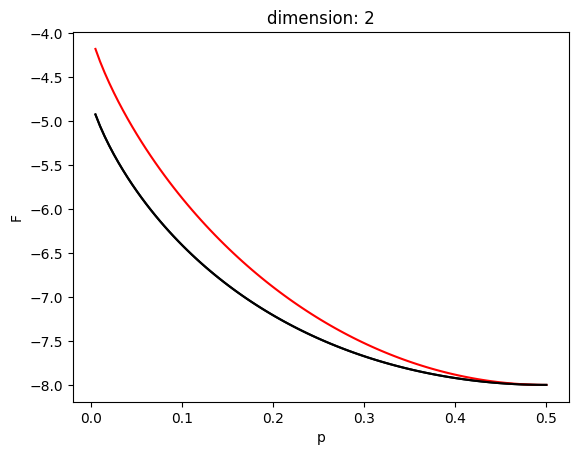

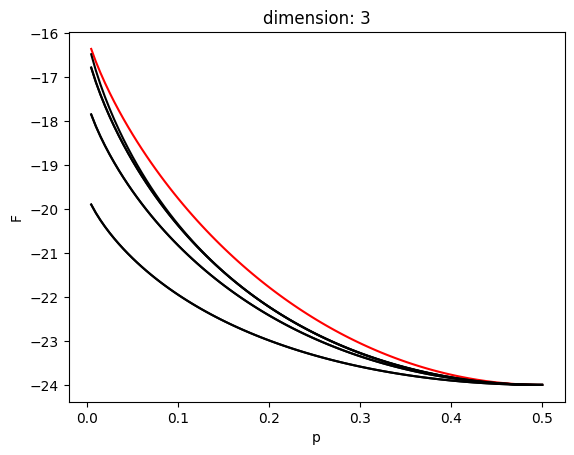

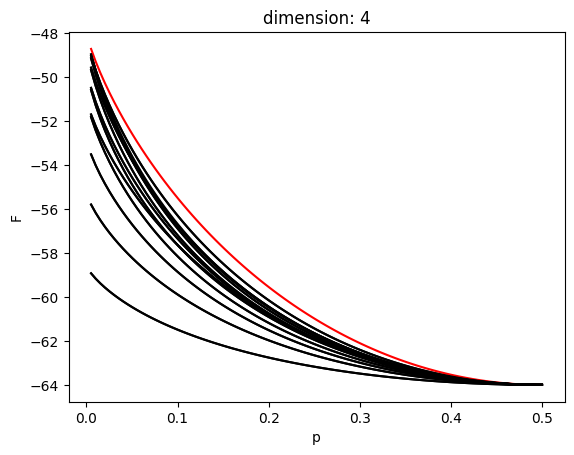

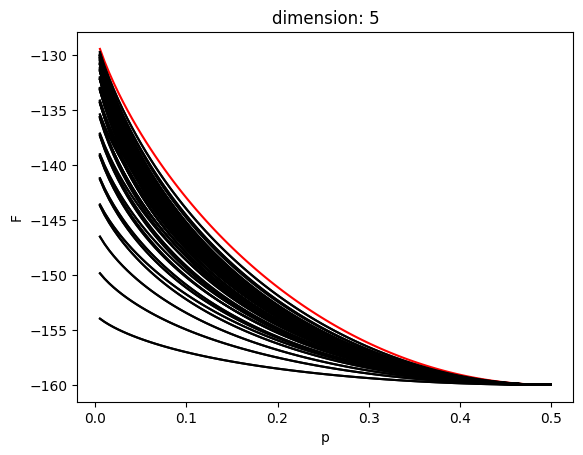

In [14]:
graph(2)
graph(3)
graph(4)
graph(5)